Author : Mounish Juvvadi (ALL THE CELLS)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/credit_risk_dataset.csv")

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
y = df["loan_status"]
x = df.drop(columns = ["loan_status"])
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=50, train_size=0.80)

In [5]:
y_train.isna().sum()

0

In [6]:
y_test.isna().sum()

0

In [7]:
X_dummies_train = pd.get_dummies(X_train)
X_dummies_test = pd.get_dummies(X_test)

In [8]:
X_dummies_train['person_emp_length'].fillna(method = 'ffill', inplace = True)
X_dummies_train['loan_int_rate'].fillna(method = 'ffill', inplace = True)

In [9]:
X_dummies_train.isna().sum()

person_age                        0
person_income                     0
person_emp_length                 0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
loan_grade_A                      0
loan_grade_B                      0
loan_grade_C                      0
loan_grade_D                      0
loan_grade_E                      0
loan_grade_F                      0
loan_grade_G                      0
cb_person_default_on_file_N       0
cb_person_default_on_file_Y       0
dtype: int64

In [10]:
X_dummies_test['person_emp_length'].fillna(method = 'ffill', inplace = True)
X_dummies_test['loan_int_rate'].fillna(method = 'ffill', inplace = True)
X_dummies_test.isna().sum()

person_age                        0
person_income                     0
person_emp_length                 0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
loan_grade_A                      0
loan_grade_B                      0
loan_grade_C                      0
loan_grade_D                      0
loan_grade_E                      0
loan_grade_F                      0
loan_grade_G                      0
cb_person_default_on_file_N       0
cb_person_default_on_file_Y       0
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_dummies_train)
X_train_scaled = scaler.transform(X_dummies_train)
X_test_scaled = scaler.transform(X_dummies_test)

In [12]:
from imblearn.over_sampling import SMOTE
def upsample(X_train,y_train):
    print("[INFO] Before Upsampling")
    sns.countplot(y_train)
    graph_file="/content/sample_data/before_upsampling.png"
    plt.savefig(graph_file)
    plt.show()
    
    print("[INFO] After Upsampling")
    
    ### Applying Upsampling
    oversample = SMOTE()
    X_train_upsampled, y_train_upsampled = oversample.fit_resample(X_train, y_train)
    graph_file="/content/sample_data/before_upsampling.png"
    sns.countplot(y_train_upsampled)
    plt.show()
    print("[INFO] Upsampling Completed")
    
    return X_train_upsampled, y_train_upsampled


[INFO] Before Upsampling


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


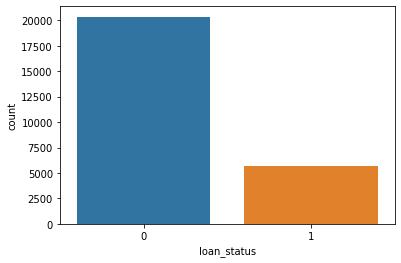

[INFO] After Upsampling


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


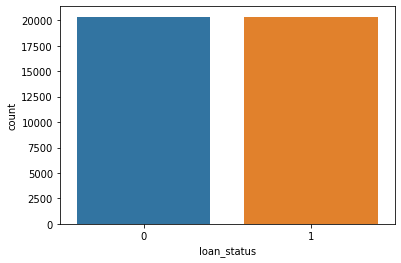

[INFO] Upsampling Completed


In [13]:
X_train_upsampled, y_train_upsampled = upsample(X_train_scaled,y_train)

1. Decision Tree

In [14]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_upsampled, y_train_upsampled)
results = model.predict(X_test_scaled)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cf_matrix = confusion_matrix(y_test, results)
cf_matrix_df = pd.DataFrame(
    cf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

In [16]:
print("Confusion Matrix")
print(cf_matrix_df)

Confusion Matrix
          Predicted 0  Predicted 1
Actual 0         4584          545
Actual 1          332         1056


In [17]:
accuracy = accuracy_score(y_test, results)
print("Accuracy Score : ", accuracy)
print("Classification Report")
print(classification_report(y_test, results))

Accuracy Score :  0.8654288783182446
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      5129
           1       0.66      0.76      0.71      1388

    accuracy                           0.87      6517
   macro avg       0.80      0.83      0.81      6517
weighted avg       0.87      0.87      0.87      6517



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


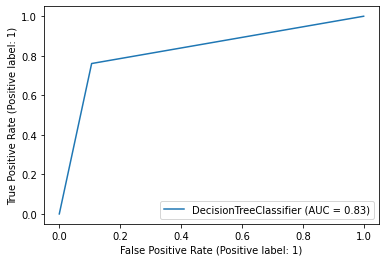

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
metrics.plot_roc_curve(model, X_test_scaled, y_test) 
graph_file= "/content/sample_data/roc_auc_plot.png"
plt.savefig(graph_file)
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
logreg  = LogisticRegression(solver='lbfgs').fit(X_train_upsampled, y_train_upsampled) 
results = logreg.predict(X_test_scaled)

In [20]:
cf_matrix = confusion_matrix(y_test, results)
cf_matrix_df = pd.DataFrame(
    cf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
print(cf_matrix_df)

Confusion Matrix
          Predicted 0  Predicted 1
Actual 0         4217          912
Actual 1          324         1064


In [21]:
accuracy = accuracy_score(y_test, results)
print("Accuracy Score : ", accuracy)
print("Classification Report")
print(classification_report(y_test, results))

Accuracy Score :  0.8103421819855762
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      5129
           1       0.54      0.77      0.63      1388

    accuracy                           0.81      6517
   macro avg       0.73      0.79      0.75      6517
weighted avg       0.85      0.81      0.82      6517



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


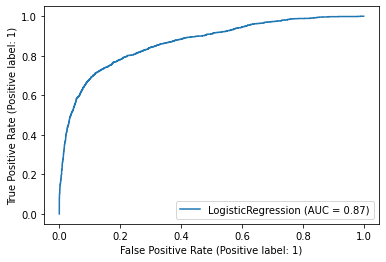

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
metrics.plot_roc_curve(logreg, X_test_scaled, y_test) 
graph_file= "/content/sample_data/roc_auc_plot.png"
plt.savefig(graph_file)
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state=10, verbose = 1, n_jobs = -1)
rf.fit(X_train_upsampled, y_train_upsampled)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.5s finished


RandomForestClassifier(n_jobs=-1, random_state=10, verbose=1)

In [24]:
results = rf.predict(X_test_scaled)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.4s finished


In [25]:
cf_matrix = confusion_matrix(y_test, results)
cf_matrix_df = pd.DataFrame(
    cf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
print(cf_matrix_df)

Confusion Matrix
          Predicted 0  Predicted 1
Actual 0         5013          116
Actual 1          367         1021


In [26]:
accuracy = accuracy_score(y_test, results)
print("Accuracy Score : ", accuracy)
print("Classification Report")
print(classification_report(y_test, results))

Accuracy Score :  0.9258861439312567
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5129
           1       0.90      0.74      0.81      1388

    accuracy                           0.93      6517
   macro avg       0.91      0.86      0.88      6517
weighted avg       0.92      0.93      0.92      6517



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.3s finished


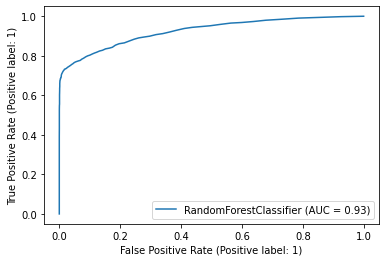

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
metrics.plot_roc_curve(rf, X_test_scaled, y_test) 
graph_file= "/content/sample_data/roc_auc_plot.png"
plt.savefig(graph_file)
plt.show()

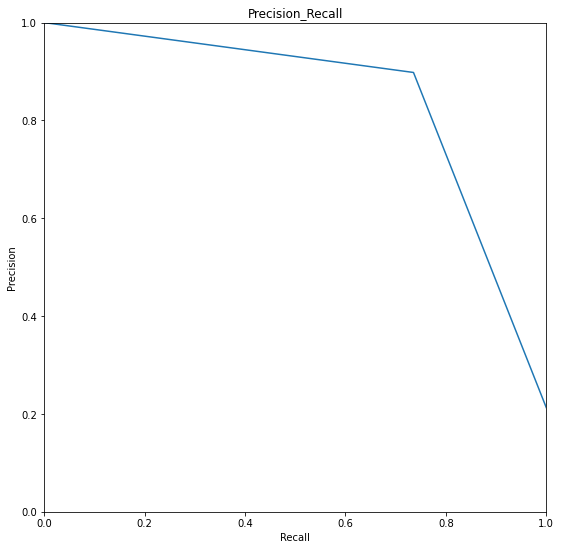

In [28]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, results)
fig = plt.figure(figsize=(9,9))
plt.title('Precision_Recall')
# Plot Precision-Recall curve
plt.plot(recall, precision)
# Axes limits and labels
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [50]:
from tensorflow import keras 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Activation, BatchNormalization
from keras.metrics import AUC
from keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy as np
def FCNN(X_train, y_train, X_test):
    batch_size = 256
    epochs = 30
    np.random.seed(5)        

    model = Sequential()

    model.add(Dense(input_shape= (X_train.shape[1],), units = 150, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units = 75, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units = 25, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    model.build()
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=["accuracy"])
    model.summary()

    early_stops = EarlyStopping(patience=10, monitor='val_acc')
    mc = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=0, save_best_only=True)
    model.fit(X_train, y_train, callbacks=[early_stops, mc], batch_size= batch_size, epochs= epochs, verbose=1)

    pred = model.predict(X_test)
  
    return pred

In [51]:
results = FCNN(X_train_upsampled, y_train_upsampled, X_test_scaled)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 150)               4050      
                                                                 
 batch_normalization_6 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 150)               0         
                                                                 
 dense_9 (Dense)             (None, 75)                11325     
                                                                 
 batch_normalization_7 (Batc  (None, 75)               300       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 75)               

159/159 [==============================] - 2s 7ms/step - loss: 0.4593 - accuracy: 0.7981
Epoch 2/30
154/159 [============================>.] - ETA: 0s - loss: 0.3647 - accuracy: 0.8329

159/159 [==============================] - 1s 7ms/step - loss: 0.3646 - accuracy: 0.8329
Epoch 3/30
158/159 [============================>.] - ETA: 0s - loss: 0.3468 - accuracy: 0.8418

159/159 [==============================] - 1s 7ms/step - loss: 0.3468 - accuracy: 0.8418
Epoch 4/30
157/159 [============================>.] - ETA: 0s - loss: 0.3379 - accuracy: 0.8432

159/159 [==============================] - 1s 7ms/step - loss: 0.3378 - accuracy: 0.8431
Epoch 5/30
157/159 [============================>.] - ETA: 0s - loss: 0.3311 - accuracy: 0.8470

159/159 [==============================] - 1s 7ms/step - loss: 0.3309 - accuracy: 0.8469
Epoch 6/30
159/159 [==============================] - ETA: 0s - loss: 0.3245 - accuracy: 0.8506

159/159 [==============================] - 1s 7ms/step - loss: 0.3245 - accuracy: 0.8506
Epoch 7/30
155/159 [============================>.] - ETA: 0s - loss: 0.3220 - accuracy: 0.8504

159/159 [==============================] - 1s 7ms/step - loss: 0.3217 - accuracy: 0.8507
Epoch 8/30
156/159 [============================>.] - ETA: 0s - loss: 0.3163 - accuracy: 0.8518

159/159 [==============================] - 1s 7ms/step - loss: 0.3161 - accuracy: 0.8520
Epoch 9/30
158/159 [============================>.] - ETA: 0s - loss: 0.3131 - accuracy: 0.8532

159/159 [==============================] - 1s 7ms/step - loss: 0.3129 - accuracy: 0.8534
Epoch 10/30
153/159 [===========================>..] - ETA: 0s - loss: 0.3100 - accuracy: 0.8540

159/159 [==============================] - 1s 7ms/step - loss: 0.3100 - accuracy: 0.8539
Epoch 11/30
156/159 [============================>.] - ETA: 0s - loss: 0.3061 - accuracy: 0.8557

159/159 [==============================] - 1s 7ms/step - loss: 0.3059 - accuracy: 0.8559
Epoch 12/30
158/159 [============================>.] - ETA: 0s - loss: 0.3064 - accuracy: 0.8571

159/159 [==============================] - 1s 7ms/step - loss: 0.3063 - accuracy: 0.8570
Epoch 13/30
155/159 [============================>.] - ETA: 0s - loss: 0.3029 - accuracy: 0.8569

159/159 [==============================] - 1s 7ms/step - loss: 0.3027 - accuracy: 0.8572
Epoch 14/30
159/159 [==============================] - ETA: 0s - loss: 0.3014 - accuracy: 0.8578

159/159 [==============================] - 1s 7ms/step - loss: 0.3014 - accuracy: 0.8578
Epoch 15/30
152/159 [===========================>..] - ETA: 0s - loss: 0.3008 - accuracy: 0.8578

159/159 [==============================] - 1s 7ms/step - loss: 0.3005 - accuracy: 0.8581
Epoch 16/30
154/159 [============================>.] - ETA: 0s - loss: 0.2991 - accuracy: 0.8601

159/159 [==============================] - 1s 7ms/step - loss: 0.2984 - accuracy: 0.8602
Epoch 17/30
154/159 [============================>.] - ETA: 0s - loss: 0.2959 - accuracy: 0.8585

159/159 [==============================] - 1s 7ms/step - loss: 0.2958 - accuracy: 0.8586
Epoch 18/30
154/159 [============================>.] - ETA: 0s - loss: 0.2940 - accuracy: 0.8599

159/159 [==============================] - 1s 7ms/step - loss: 0.2951 - accuracy: 0.8592
Epoch 19/30
157/159 [============================>.] - ETA: 0s - loss: 0.2933 - accuracy: 0.8602

159/159 [==============================] - 1s 8ms/step - loss: 0.2933 - accuracy: 0.8600
Epoch 20/30
153/159 [===========================>..] - ETA: 0s - loss: 0.2922 - accuracy: 0.8612

159/159 [==============================] - 1s 7ms/step - loss: 0.2923 - accuracy: 0.8615
Epoch 21/30
159/159 [==============================] - ETA: 0s - loss: 0.2898 - accuracy: 0.8624

159/159 [==============================] - 1s 7ms/step - loss: 0.2898 - accuracy: 0.8624
Epoch 22/30
153/159 [===========================>..] - ETA: 0s - loss: 0.2869 - accuracy: 0.8647

159/159 [==============================] - 1s 7ms/step - loss: 0.2875 - accuracy: 0.8644
Epoch 23/30
153/159 [===========================>..] - ETA: 0s - loss: 0.2864 - accuracy: 0.8632

159/159 [==============================] - 1s 7ms/step - loss: 0.2862 - accuracy: 0.8633
Epoch 24/30
159/159 [==============================] - ETA: 0s - loss: 0.2854 - accuracy: 0.8643

159/159 [==============================] - 1s 7ms/step - loss: 0.2854 - accuracy: 0.8643
Epoch 25/30
154/159 [============================>.] - ETA: 0s - loss: 0.2859 - accuracy: 0.8640

159/159 [==============================] - 1s 7ms/step - loss: 0.2857 - accuracy: 0.8641
Epoch 26/30
157/159 [============================>.] - ETA: 0s - loss: 0.2850 - accuracy: 0.8634

159/159 [==============================] - 1s 7ms/step - loss: 0.2850 - accuracy: 0.8633
Epoch 27/30
158/159 [============================>.] - ETA: 0s - loss: 0.2828 - accuracy: 0.8661

159/159 [==============================] - 1s 7ms/step - loss: 0.2827 - accuracy: 0.8661
Epoch 28/30
159/159 [==============================] - ETA: 0s - loss: 0.2810 - accuracy: 0.8660

159/159 [==============================] - 1s 8ms/step - loss: 0.2810 - accuracy: 0.8660
Epoch 29/30
153/159 [===========================>..] - ETA: 0s - loss: 0.2798 - accuracy: 0.8667

159/159 [==============================] - 1s 7ms/step - loss: 0.2798 - accuracy: 0.8670
Epoch 30/30
153/159 [===========================>..] - ETA: 0s - loss: 0.2785 - accuracy: 0.8658

204/204 [==============================] - 1s 2ms/step


In [53]:
print(results)

[[2.2991142e-01]
 [5.5191469e-01]
 [3.9725611e-01]
 ...
 [6.1743420e-01]
 [3.3803080e-04]
 [9.5911872e-01]]


In [52]:
print('ROC_AUC of the test set:', roc_auc_score(y_test, results))
results_class = (np.array(results) > 0.8).astype(int)
cm = confusion_matrix(y_test, results_class)
print('\nConfusion_metrix : \n', cm)
tn = cm[0][0]
fp = cm[0][1]    
fn = cm[1][0]
tp = cm[1][1]
precision = tp / (tp + fp)
print( 'Precision : ', precision )
recall = tp / (tp + fn)
print( 'Recall : ', recall )
print( 'F1-score :', 2*precision*recall/(precision+recall))

ROC_AUC of the test set: 0.9082605380604047

Confusion_metrix : 
 [[5092   37]
 [ 467  921]]
Precision :  0.9613778705636743
Recall :  0.6635446685878963
F1-score : 0.7851662404092071
